In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Dataset

#Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data preprocessing

#Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Veggies/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Veggies/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model


In [6]:

cnn = tf.keras.models.Sequential()

#Building Convolutional Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:

cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [16]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 588s 6s/step - loss: 7.1716 - accuracy: 0.0299 - val_loss: 3.5833 - val_accuracy: 0.0256
Epoch 2/32
98/98 [==============================] - 155s 2s/step - loss: 3.5808 - accuracy: 0.0324 - val_loss: 3.5818 - val_accuracy: 0.0313
Epoch 3/32
98/98 [==============================] - 152s 1s/step - loss: 3.5752 - accuracy: 0.0366 - val_loss: 3.5672 - val_accuracy: 0.0342
Epoch 4/32
98/98 [==============================] - 150s 1s/step - loss: 3.5650 - accuracy: 0.0356 - val_loss: 3.5516 - val_accuracy: 0.0399
Epoch 5/32
98/98 [==============================] - 155s 2s/step - loss: 3.5471 - accuracy: 0.0395 - val_loss: 3.5290 - val_accuracy: 0.0513
Epoch 6/32
98/98 [==============================] - 150s 1s/step - loss: 3.5245 - accuracy: 0.0507 - val_loss: 3.4998 - val_accuracy: 0.0570
Epoch 7/32
98/98 [==============================] - 150s 1s/step - loss: 3.5006 - accuracy: 0.0639 - val_loss: 3.4741 - val_accuracy: 0.0769
Epoch 8/32
98

#Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 96s 910ms/step - loss: 0.3239 - accuracy: 0.9262
Training accuracy: 0.9261637330055237


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 14s 321ms/step - loss: 0.5854 - accuracy: 0.9088
Validation accuracy: 0.9088318943977356


#Saving Model

In [22]:
cnn.save('trained_model.keras')


In [23]:
training_history.history #Return Dictionary of history

{'loss': [7.171600341796875,
  3.5808022022247314,
  3.5751681327819824,
  3.5650136470794678,
  3.547135829925537,
  3.524479866027832,
  3.50061297416687,
  3.485374689102173,
  3.4360179901123047,
  3.3706278800964355,
  3.3182077407836914,
  3.244032859802246,
  3.0991501808166504,
  2.9282383918762207,
  2.7910633087158203,
  2.623415470123291,
  2.499572515487671,
  2.3154966831207275,
  2.174039840698242,
  1.9868526458740234,
  1.8629873991012573,
  1.6534607410430908,
  1.5479629039764404,
  1.39266836643219,
  1.2649589776992798,
  1.1527276039123535,
  1.0388976335525513,
  0.9784393906593323,
  0.850094735622406,
  0.7878480553627014,
  0.8117356896400452,
  0.7323526740074158],
 'accuracy': [0.02985553815960884,
  0.03242375701665878,
  0.0365971103310585,
  0.035634029656648636,
  0.0394863560795784,
  0.050722312182188034,
  0.0638844296336174,
  0.06998395174741745,
  0.07929374277591705,
  0.09951845556497574,
  0.10818619281053543,
  0.135794535279274,
  0.17239165306

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:

print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating Accuracy of Model Achieved on Validation set

In [26]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.88318943977356 %


#Accuracy Visualization

## Training Visualization

In [27]:
#training_history.history['accuracy']

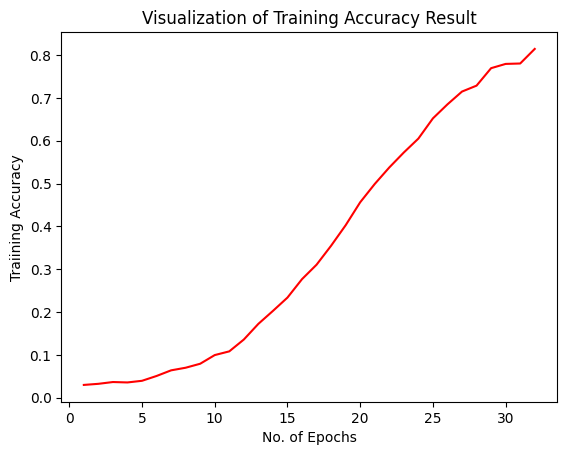

In [28]:

epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

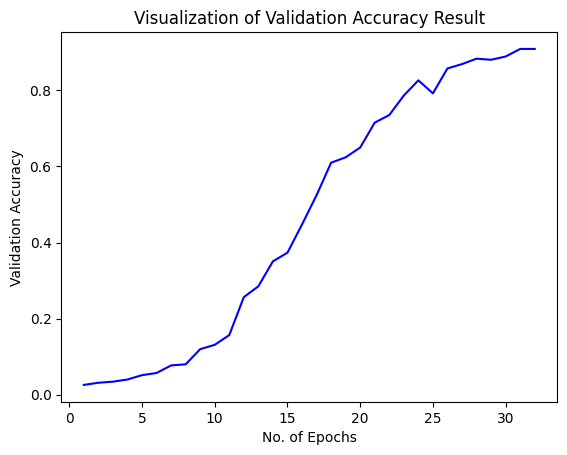

In [29]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


#Test set Evaluation

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Veggies/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [32]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 106s 1s/step - loss: 0.5832 - accuracy: 0.9081
Test accuracy: 0.9080780148506165
